In [7]:
# Ariadne Selena Romero Rivero #1957540
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv("../videogamesales/videogamesales_clean.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16322,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16323,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16324,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16325,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [62]:
# Características
features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
data = df[features]

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

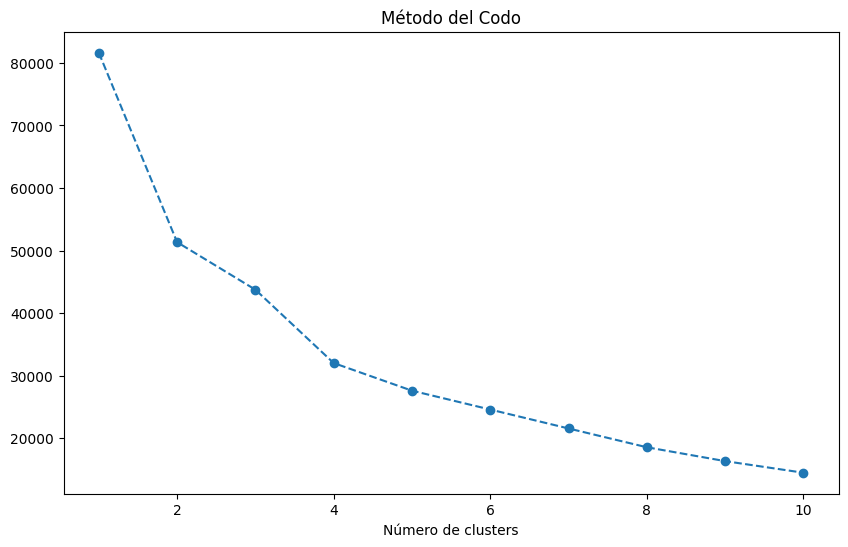

In [63]:
# Calcular números de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Graficar el Método del Codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.show()

In [68]:
# Crear modelo K-Means con 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Añadir etiquetas de cluster al dataframe original
df['Cluster'] = clusters

In [73]:
visualizar = df[df['Cluster']==3]
visualizar

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Cluster
43,44,Halo 3,X360,2007,Shooter,Microsoft Game Studios,7.97,2.83,0.13,1.21,12.14,3
46,47,Super Mario 64,N64,1996,Platform,Nintendo,6.91,2.85,1.91,0.23,11.89,3
48,49,Super Mario Galaxy,Wii,2007,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52,3
49,50,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33,3
50,51,Super Mario Land 2: 6 Golden Coins,GB,1992,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1237,1251,The Simpsons Game,PS2,2007,Action,Electronic Arts,0.35,0.03,0.00,1.13,1.51,3
1368,1383,Need For Speed: Undercover,PS2,2008,Racing,Electronic Arts,0.38,0.08,0.03,0.93,1.40,3
1413,1428,SingStar Abba,PS2,2008,Misc,Sony Computer Entertainment,0.23,0.04,0.00,1.09,1.36,3
1472,1488,World of Warcraft: Wrath of the Lich King,PC,2008,Role-Playing,Activision,0.01,0.13,0.00,1.18,1.32,3


          NA_Sales   EU_Sales  JP_Sales  Other_Sales  Global_Sales
Cluster                                                           
0         0.169132   0.083781  0.050923     0.027226      0.331358
1         9.297609   5.387609  2.853478     1.859130     19.397609
2        41.490000  29.020000  3.770000     8.460000     82.740000
3         1.896641   1.278663  0.548958     0.418802      4.142893


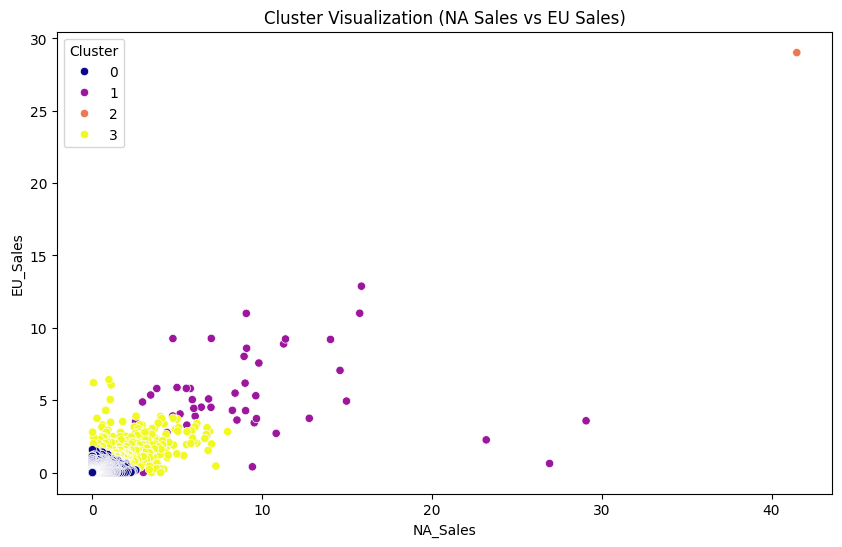

In [ ]:
# Cluster analysis
cluster_analysis = df.groupby('Cluster')[features].mean()
print(cluster_analysis)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='NA_Sales', y='EU_Sales', hue='Cluster', data=df, palette='plasma')
plt.title('Cluster Visualization (NA Sales vs EU Sales)')
plt.show()

El cluster 2 esta conformado por solo 1 valor, debido a que es un valor muy grande

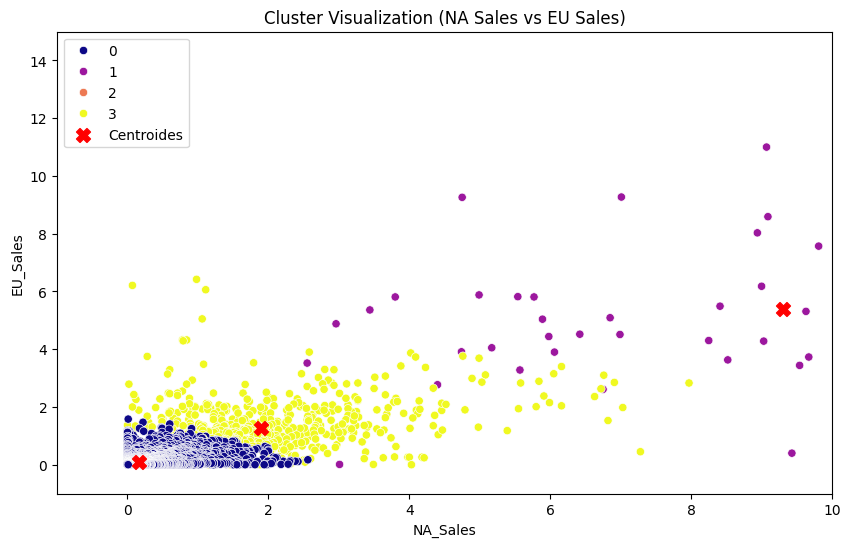

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de los clústeres con acercamiento y marcadores "X"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NA_Sales', y='EU_Sales', hue='Cluster', data=df, palette='plasma')

# Marcar los centroides con una 'X'
plt.scatter(cluster_analysis['NA_Sales'], cluster_analysis['EU_Sales'], 
            color='red', marker='X', s=100, label='Centroides')

# Zoom en la gráfica (ajustar según rango de tus datos)
plt.ylim(-1,15) 
plt.xlim(-1,10) 

plt.title('Cluster Visualization (NA Sales vs EU Sales)')
plt.legend()
plt.show()